In [1]:
##############################
# Import Modules
##############################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.tsa.stattools import pacf, adfuller
from scipy.stats import boxcox
import warnings
from datetime import datetime
import pprint

In [2]:
##############################
# Suppress Warnings Settings and Pretty Print Settings
##############################

# suppress warnings completely
warnings.filterwarnings('ignore')

# suppress warnings after seen once
# warnings.filterwarnings(action='once')

# pretty print settings
pp = pprint.PrettyPrinter(indent=4)

# Data Ingest

In [3]:
##############################
# Import Dataset
##############################

# import dataset from csv
dataframe = pd.read_csv('dataset/leads_data_ecg_80bpm.csv', engine='python')

# select lead to be used
lead = 'II'

# seperate data for hold out (split) testing
use_dataframe = dataframe.iloc[0:1200][lead]
test_dataframe = dataframe.iloc[1200:2501][lead]

# values of time series data
y = use_dataframe.values
y_test = test_dataframe.values

# Data Visualizations (Exploratory Analysis)

In [77]:
# dataset head
dataframe.head(5)

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-0.050198,-0.076091,-0.025893,0.063145,-0.012153,-0.050992,-0.000840,-0.028631,-0.092191,-0.093338,-0.068195,-0.053028
1,-0.050485,-0.077593,-0.027108,0.064039,-0.011688,-0.052351,-0.000232,-0.027201,-0.091154,-0.092730,-0.067873,-0.053314
2,-0.051844,-0.081384,-0.029540,0.066614,-0.011152,-0.055462,-0.001805,-0.029132,-0.090403,-0.094125,-0.068731,-0.054351
3,-0.053167,-0.083172,-0.030005,0.068169,-0.011581,-0.056589,-0.002914,-0.030956,-0.091440,-0.095412,-0.070555,-0.056533
4,-0.051486,-0.081742,-0.030256,0.066614,-0.010615,-0.055999,-0.001305,-0.029132,-0.091869,-0.093767,-0.069518,-0.056318


In [9]:
# dataset characteristics
dataframe.describe()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.000732,-0.001649,-0.000917,0.001191,0.000092,-0.001283,0.000154,-0.000187,-0.001512,-0.001540,-0.001054,-0.000835
std,0.096033,0.152231,0.058245,0.123896,0.022668,0.104775,0.104625,0.180427,0.226045,0.203662,0.158885,0.129099
min,-0.134404,-0.150894,-0.072932,-0.708995,-0.063979,-0.101309,-0.782918,-1.223959,-0.981518,-0.435642,-0.183906,-0.168575
25%,-0.048112,-0.074307,-0.026202,-0.019785,-0.011435,-0.050248,-0.000497,-0.025264,-0.086267,-0.089314,-0.068889,-0.054465
50%,-0.044915,-0.069025,-0.023507,0.056971,-0.010038,-0.046433,0.002317,-0.017854,-0.077033,-0.084215,-0.064195,-0.050498
75%,0.015990,0.023847,0.006124,0.061297,0.004202,0.014806,0.017620,0.032129,0.027763,0.013491,0.020266,0.010303
max,0.524461,0.897638,0.383840,0.139863,0.083425,0.638810,0.210424,0.451265,1.060935,1.180315,1.009452,0.811356


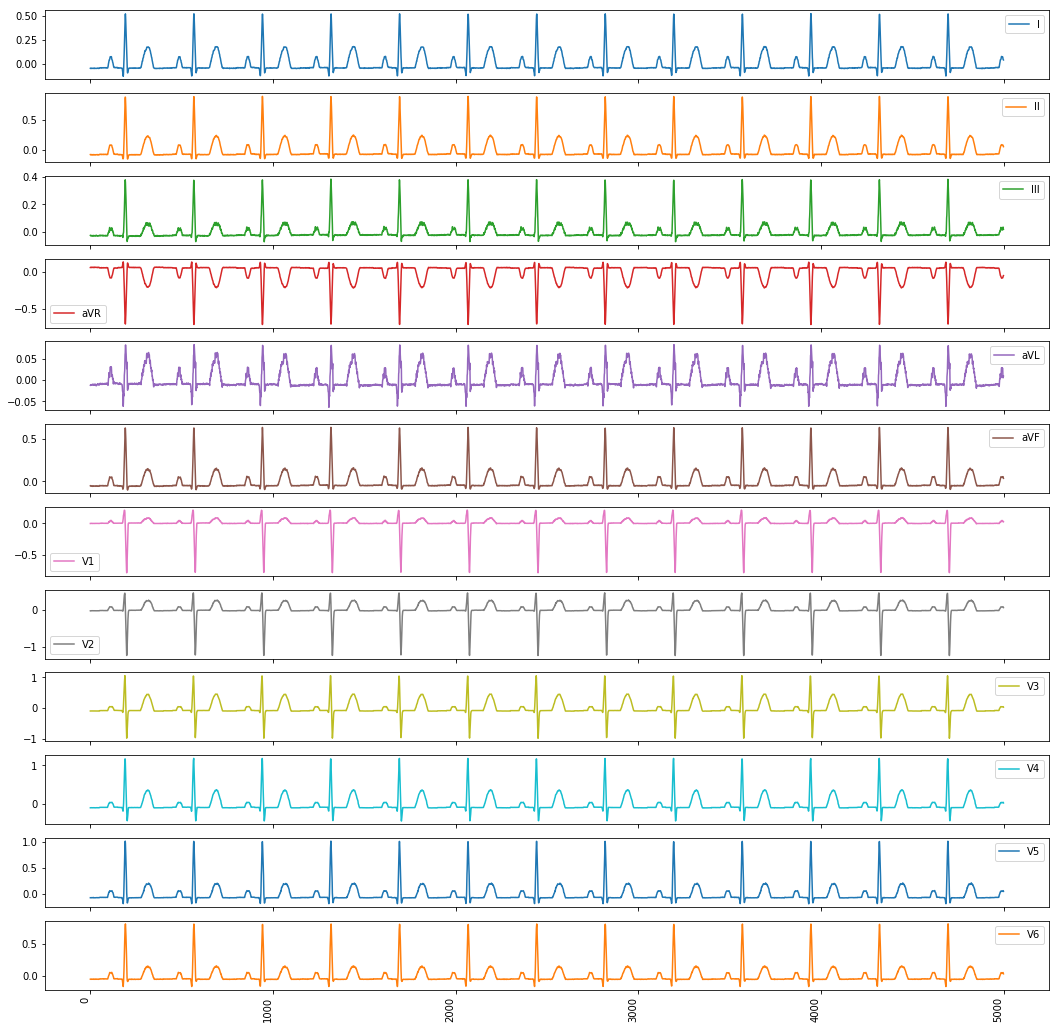

In [10]:
##############################
# Visualize Data from all leads
##############################

dataframe.plot(figsize=(18, 20), subplots=True)
plt.xticks(rotation=90)
plt.show()

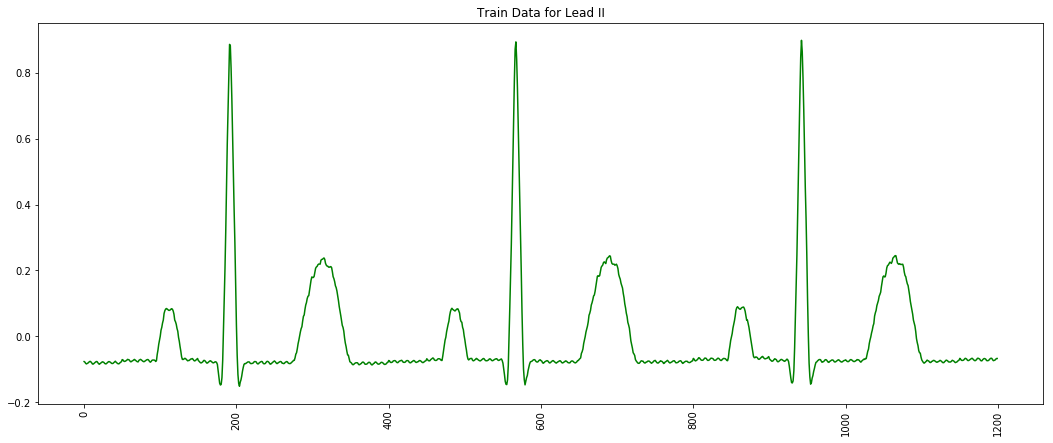

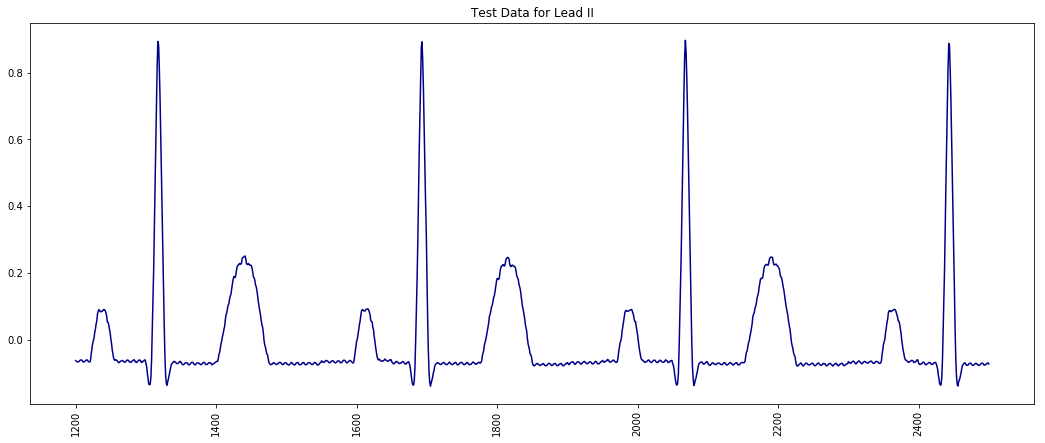

In [4]:
##############################
# Visualize Data from Selected Lead
##############################

use_dataframe.plot(figsize=(18, 7), color='g')
plt.title('Train Data for Lead {}'.format(lead))
plt.xticks(rotation=90)
plt.show()

test_dataframe.plot(figsize=(18, 7), color='darkblue')
plt.title('Test Data for Lead {}'.format(lead))
plt.xticks(rotation=90)
plt.show()

# Model Construction (Confirmatory Analysis)
# Data Transformations

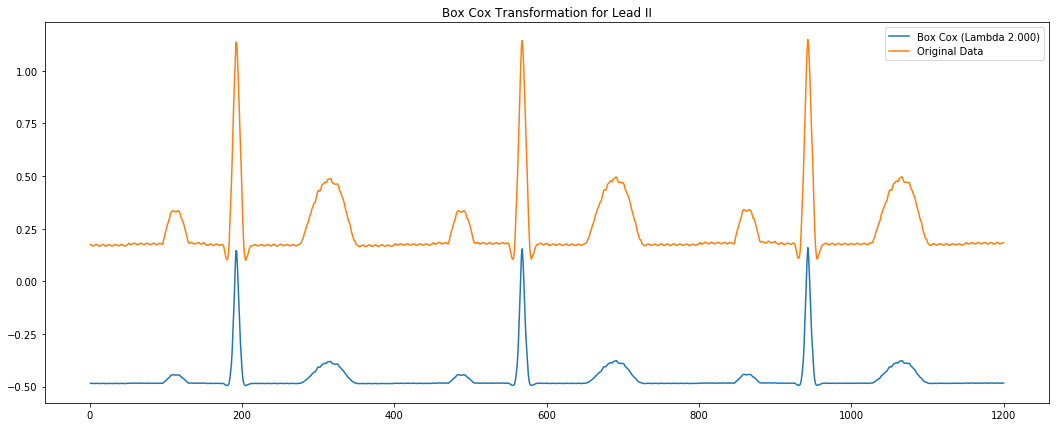

In [5]:
##############################
# Visualize Box Cox Transformation
##############################

# make df positive by adding constant
constant = use_dataframe.min(0)
positive_dataframe = use_dataframe + np.abs(constant) + 0.1

# box cox transformation
lmbda = 2
Y_boxcox = boxcox(positive_dataframe, lmbda)

# plot box cox transform
x_vals = np.arange(1, 1201)
plt.subplots(figsize=(18, 7))
plt.title('Box Cox Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_boxcox, label='Box Cox (Lambda {:0.3f})'.format(lmbda))

# plot original data
plt.plot(x_vals, positive_dataframe.values, label='Original Data')

plt.legend()
plt.show()


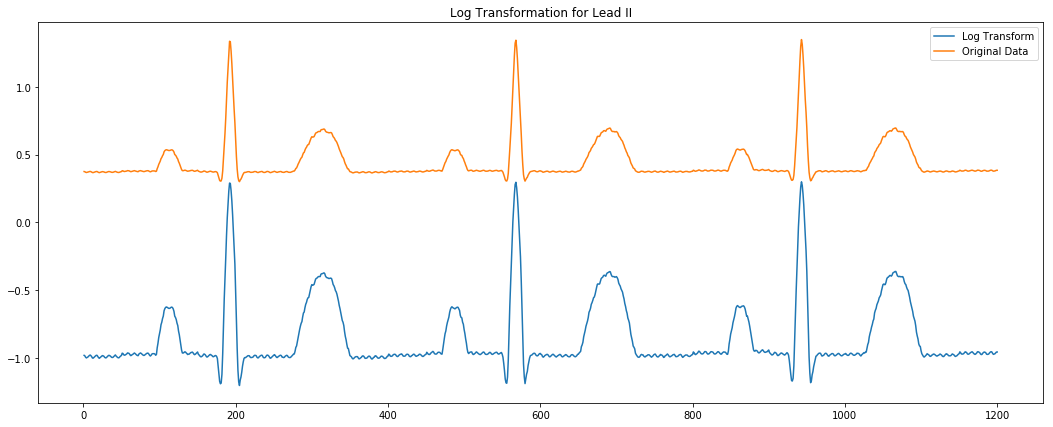

In [13]:
##############################
# Visualize Log transformation
##############################

# make df positive by adding constant
constant = use_dataframe.min(0)
positive_dataframe = use_dataframe + np.abs(constant) + 0.3

# log transformation
Y_log = positive_dataframe.apply(np.log)

# plot log transform
x_vals = np.arange(1, 1201)
plt.subplots(figsize=(18, 7))
plt.title('Log Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_log, label='Log Transform')

# plot original data
plt.plot(x_vals, positive_dataframe.values, label='Original Data')

plt.legend()
plt.show()

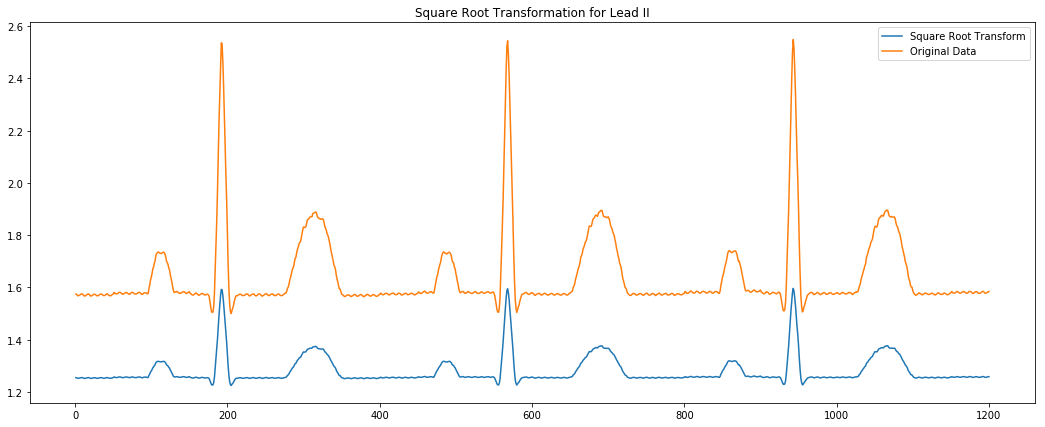

In [84]:
##############################
# Visualize Square Root Transformation
##############################

# make df positive by adding constant
constant = use_dataframe.min(0)
positive_dataframe = use_dataframe + np.abs(constant) + 1.5

# sqrt transformation
Y_sqrt = positive_dataframe.apply(np.sqrt)

# plot sqrt transform
x_vals = np.arange(1, 1201)
plt.subplots(figsize=(18, 7))
plt.title('Square Root Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_sqrt, label='Square Root Transform')

# plot original data
plt.plot(x_vals, positive_dataframe.values, label='Original Data')

plt.legend()
plt.show()

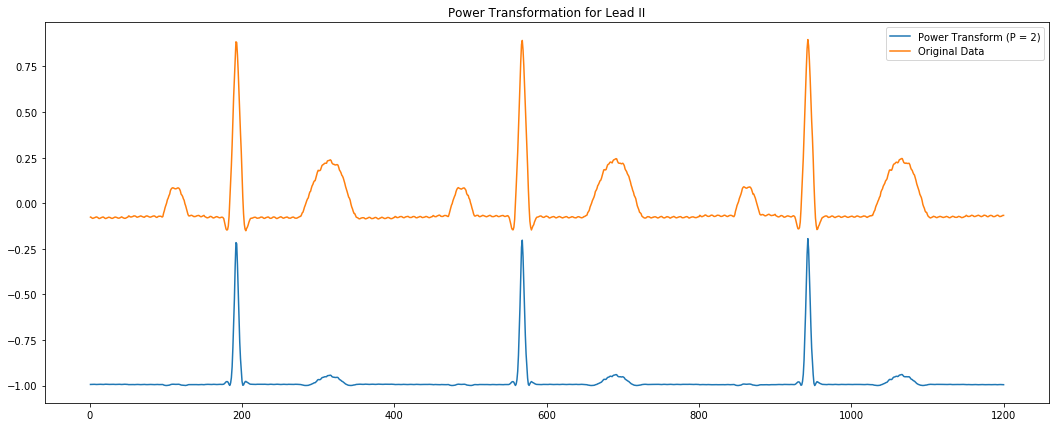

In [85]:
##############################
# Visualize Power Transformation
##############################

# power transformation
power = 2
Y_power = use_dataframe ** power - 1

# plot sqrt transform
x_vals = np.arange(1, 1201)
plt.subplots(figsize=(18, 7))
plt.title('Power Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_power, label='Power Transform (P = {})'.format(power))

# plot original data
plt.plot(x_vals, use_dataframe.values, label='Original Data')

plt.legend()
plt.show()


# Model Identification

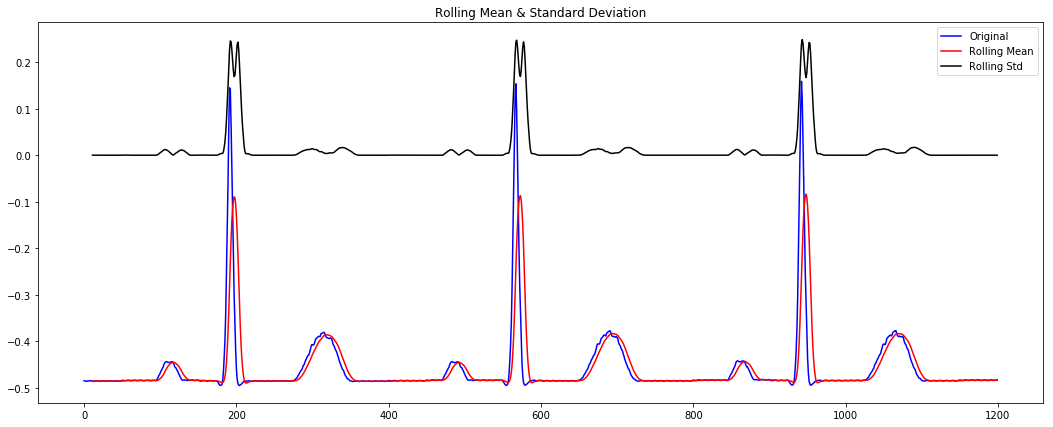

Results of Dickey-Fuller Test:
Test Statistic                -6.268024e+00
p-value                        4.068620e-08
#Lags Used                     1.900000e+01
Number of Observations Used    1.180000e+03
Critical Value (1%)           -3.435904e+00
Critical Value (5%)           -2.863992e+00
Critical Value (10%)          -2.568076e+00
dtype: float64


In [6]:
##############################
# Test Stationarity
##############################

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(18, 7))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


df_boxcox = pd.Series(Y_boxcox)
test_stationarity(df_boxcox)

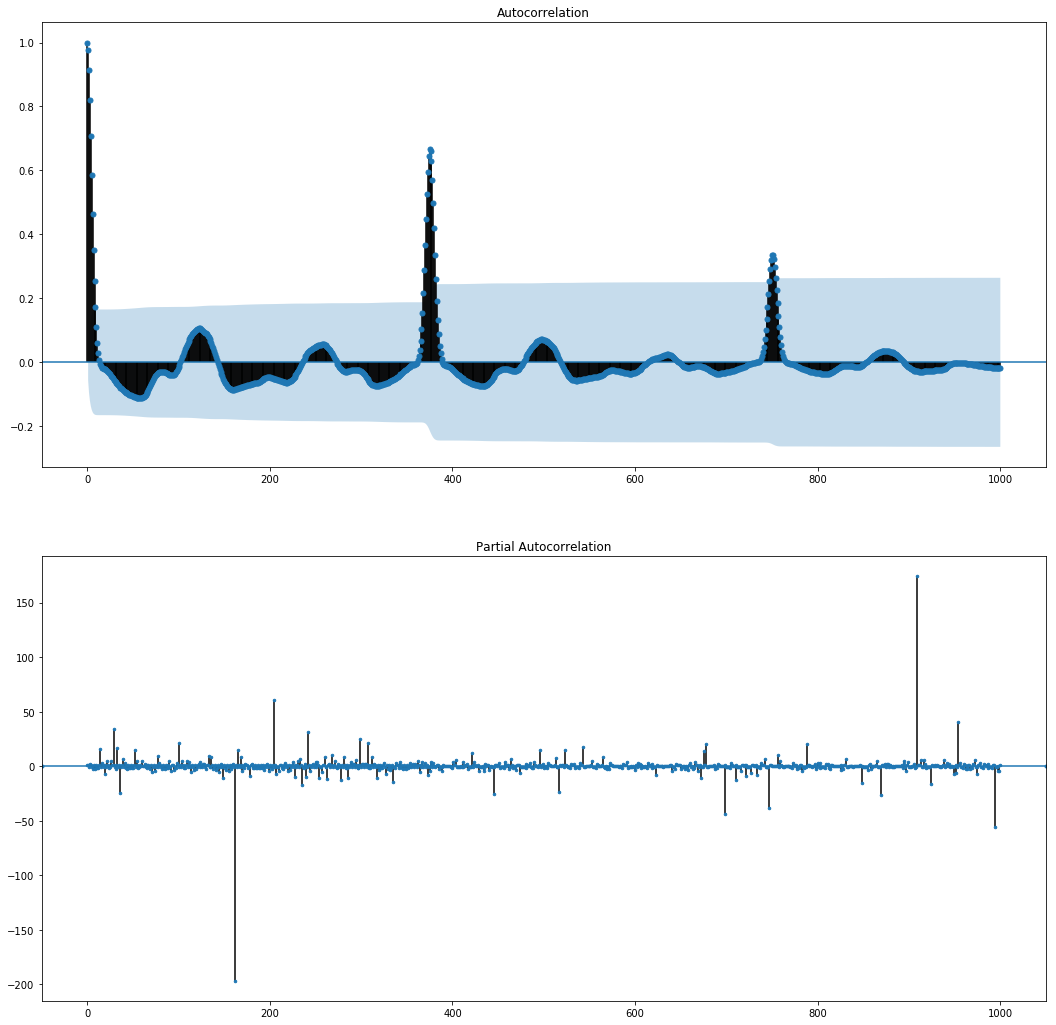

In [20]:
##############################
# Plot ACF and PACF
##############################

y = Y_boxcox

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(y, lags=1000, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(y, lags=1000, ax=ax2, **{'marker': '.'})
plt.show()


## Seasonal Differencing

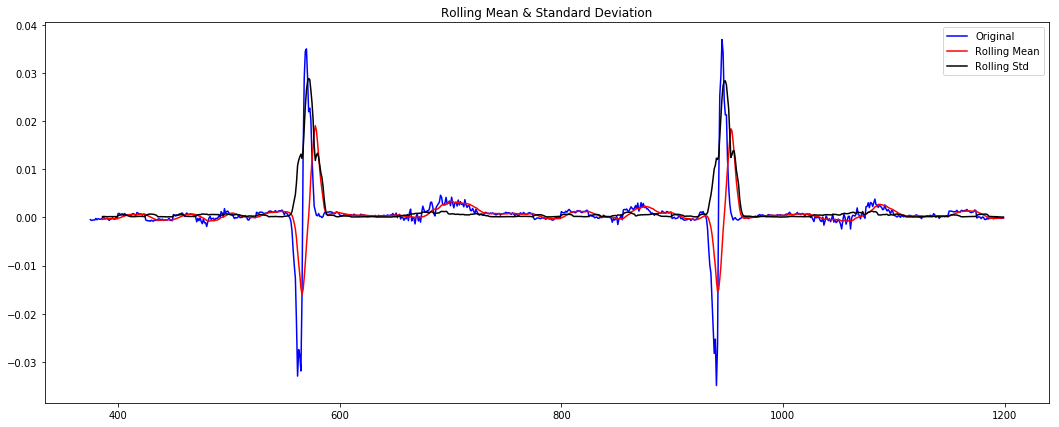

Results of Dickey-Fuller Test:
Test Statistic                -1.202607e+01
p-value                        2.947032e-22
#Lags Used                     6.000000e+00
Number of Observations Used    8.180000e+02
Critical Value (1%)           -3.438369e+00
Critical Value (5%)           -2.865080e+00
Critical Value (10%)          -2.568655e+00
dtype: float64


In [10]:
##############################
# Apply Seasonal Differencing
##############################

df_seasonal_diff = df_boxcox - df_boxcox.shift(375)
df_seasonal_diff.dropna(inplace=True)

test_stationarity(df_seasonal_diff)

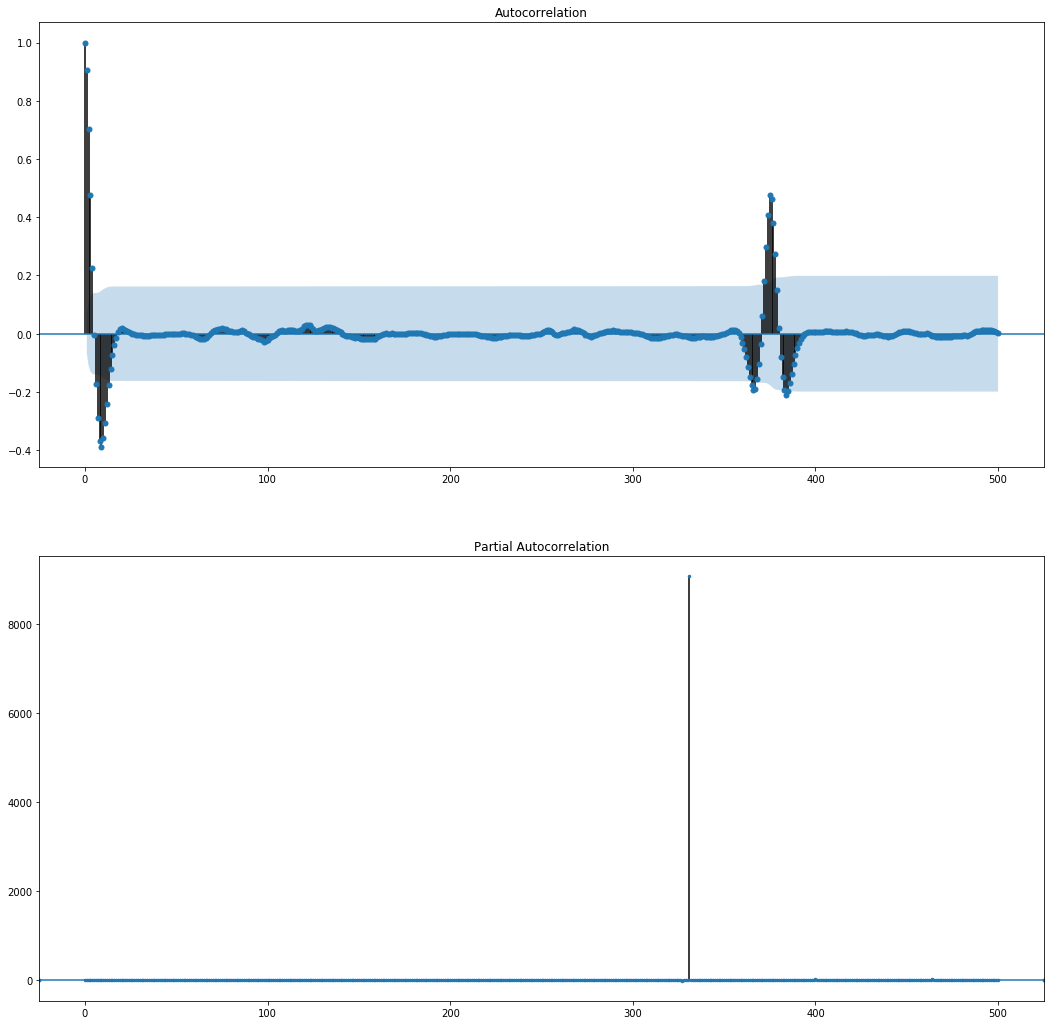

In [11]:
##############################
# Plot ACF and PACF
##############################

y = df_seasonal_diff.values

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(y, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(y, lags=50, ax=ax2, **{'marker': '.'})
plt.show()


# Seasonal Decomposition

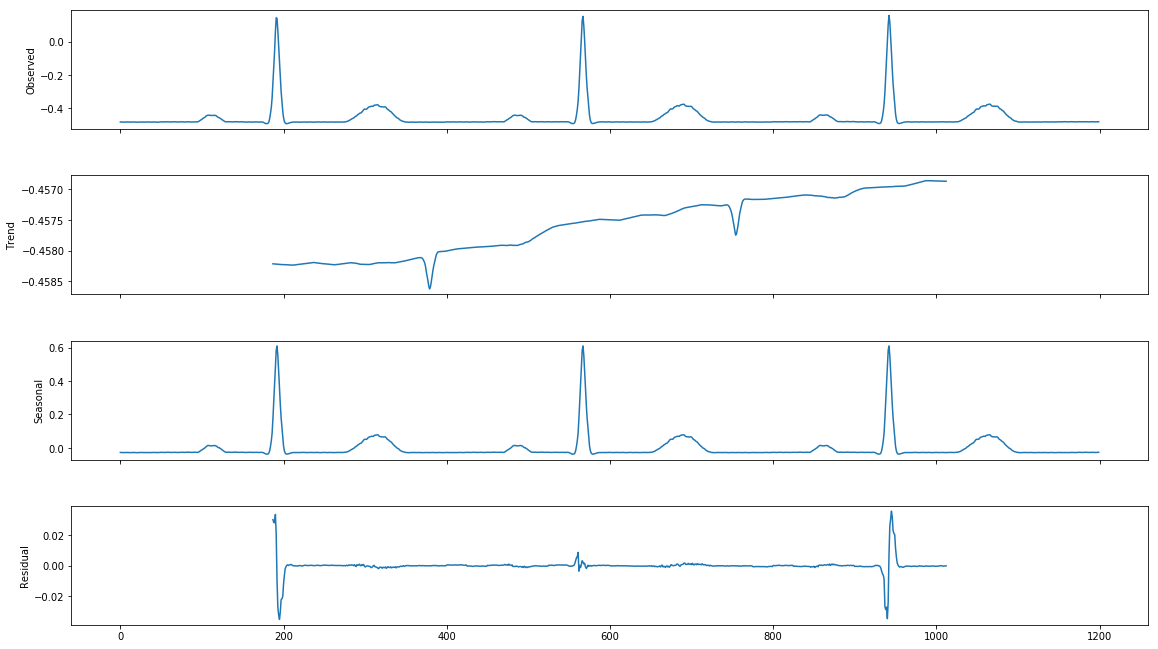

In [23]:
##############################
# Decompose the Transformed Data
##############################
decomposition = sm.tsa.seasonal.seasonal_decompose(df_boxcox, model='additive', freq=375)

fig = decomposition.plot()
fig.set_size_inches(18.5, 10)
plt.show()

# Parameter Estimation

## Parameter Estimation and AIC Scores

In [24]:
%%time
##############################
# Build SARIMA (1,0,0)x(1,0,0)s
##############################

model = sm.tsa.statespace.sarimax.SARIMAX(df_boxcox, order=(1,0,0), seasonal_order=(1,0,0,375))
model_1 = model.fit()
print(model_1.summary())


                                  Statespace Model Results                                 
Dep. Variable:                                   y   No. Observations:                 1200
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 375)   Log Likelihood                4682.106
Date:                             Mon, 03 Dec 2018   AIC                          -9358.212
Time:                                     08:57:41   BIC                          -9342.942
Sample:                                          0   HQIC                         -9352.460
                                            - 1200                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.001   1665.514      0.000       0.998       1.001
ar.S.L375      0.9988   9.7

In [29]:
%%time
##############################
# Build SARIMA (0,0,0)x(1,0,0)s
##############################

model = sm.tsa.statespace.sarimax.SARIMAX(df_boxcox, order=(0,0,0), seasonal_order=(1,0,0,375))
model_2 = model.fit()
print(model_2.summary())


                             Statespace Model Results                            
Dep. Variable:                         y   No. Observations:                 1200
Model:             SARIMAX(1, 0, 0, 375)   Log Likelihood                2934.338
Date:                   Mon, 03 Dec 2018   AIC                          -5864.676
Time:                           10:12:42   BIC                          -5854.496
Sample:                                0   HQIC                         -5860.841
                                  - 1200                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L375      0.9999   3.21e-05   3.12e+04      0.000       1.000       1.000
sigma2        2.7e-05   3.55e-07     76.051      0.000    2.63e-05    2.77e-05
Ljung-Box (Q):              

In [35]:
%%time
##############################
# Build SARIMA (1,0,1)x(1,0,0)s
##############################

model = sm.tsa.statespace.sarimax.SARIMAX(df_boxcox, order=(1,0,1), seasonal_order=(1,0,0,375), enforce_invertibility=False)
model_3 = model.fit()
print(model_3.summary())


                                  Statespace Model Results                                 
Dep. Variable:                                   y   No. Observations:                 1200
Model:             SARIMAX(1, 0, 1)x(1, 0, 0, 375)   Log Likelihood                4952.938
Date:                             Mon, 03 Dec 2018   AIC                          -9897.875
Time:                                     10:41:50   BIC                          -9877.515
Sample:                                          0   HQIC                         -9890.206
                                            - 1200                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.001   1086.793      0.000       0.997       1.001
ma.L1          1.5495      

In [50]:
%%time
##############################
# Build SARIMA (1,1,0)x(1,0,0)s
##############################

model = sm.tsa.statespace.sarimax.SARIMAX(df_boxcox, order=(1,1,0), seasonal_order=(1,0,0,375))
model_4 = model.fit()
print(model_4.summary())


                                  Statespace Model Results                                 
Dep. Variable:                                   y   No. Observations:                 1200
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 375)   Log Likelihood                5144.814
Date:                             Mon, 03 Dec 2018   AIC                         -10283.628
Time:                                     15:56:52   BIC                         -10268.360
Sample:                                          0   HQIC                        -10277.876
                                            - 1200                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9083      0.005    193.435      0.000       0.899       0.918
ar.S.L375      0.9909      

In [71]:
%%time
##############################
# Build SARIMA (1,1,1)x(1,0,0)s
##############################

model = sm.tsa.statespace.sarimax.SARIMAX(df_boxcox, order=(1,1,1), seasonal_order=(1,0,0,375))
model_5 = model.fit()
print(model_5.summary())


                                  Statespace Model Results                                 
Dep. Variable:                                   y   No. Observations:                 1200
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 375)   Log Likelihood                4894.724
Date:                             Mon, 03 Dec 2018   AIC                          -9781.447
Time:                                     17:52:53   BIC                          -9761.090
Sample:                                          0   HQIC                         -9773.778
                                            - 1200                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8393      0.016     52.956      0.000       0.808       0.870
ma.L1          0.7882      

In [83]:
%%time
##############################
# Build ARIMA (10,0,0)
##############################

model = sm.tsa.arima_model.ARIMA(df_boxcox, order=(4, 1, 0))
model_deseason_1 = model.fit()
print(model_deseason_1.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1199
Model:                 ARIMA(4, 1, 0)   Log Likelihood                4771.283
Method:                       css-mle   S.D. of innovations              0.005
Date:                Tue, 04 Dec 2018   AIC                          -9530.567
Time:                        15:41:49   BIC                          -9500.032
Sample:                             1   HQIC                         -9519.064
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.366e-07      0.001      0.001      0.999      -0.001       0.001
ar.L1.D.y      1.6595      0.027     60.408      0.000       1.606       1.713
ar.L2.D.y     -1.1422      0.052    -21.797      0.0

In [ ]:
%%time
# forecasting for quick check
df_forecast = model_1.predict(start = 1000, end= 2000, dynamic= True)  
fig = plt.figure(figsize=(18, 7))
df_forecast.plot(label='forecast')
df_boxcox.plot(label='data')
plt.legend()
plt.show()

# Forecasting for Deseasonalized Model

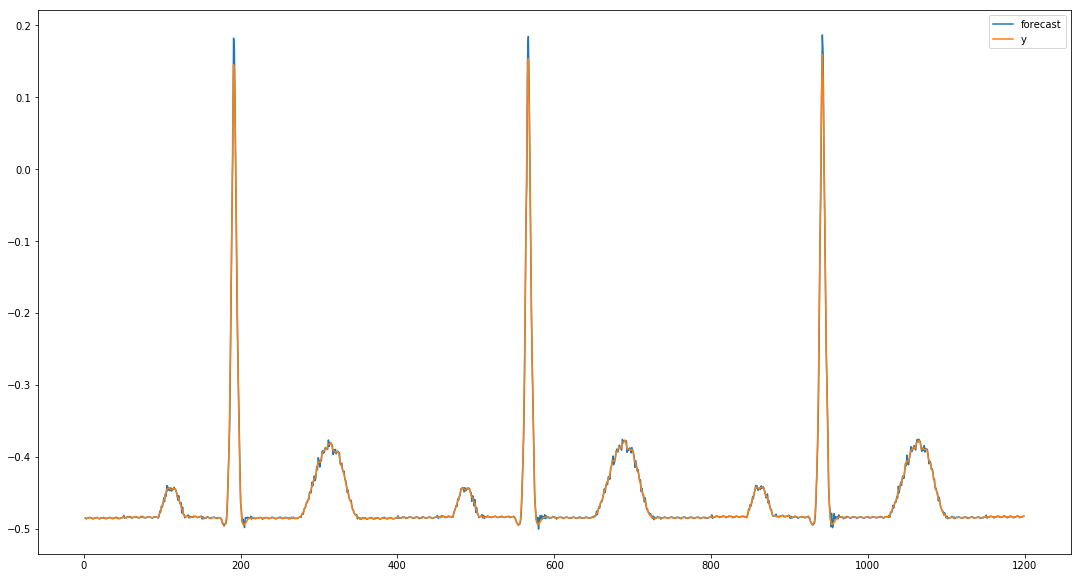

RMSE: nan


In [46]:
##############################
# RMSE for Deseasonalized Model
##############################

RMSE = sum((model_deseason_1.fittedvalues - df_seasonal_diff)**2)
fig = model_deseason_1.plot_predict()
fig.set_size_inches(18.5, 10)
plt.show()

print('RMSE: {}'.format(RMSE))

In [47]:
##############################
# Convert to Original Scale for Forecasting
##############################

# find cumulative sum 
predicted_ARIMA_diff = pd.Series(model_deseason_1.fittedvalues, copy=True)
predicted_ARIMA_diff_cumsum = predicted_ARIMA_diff.cumsum()

# make predictions
predicted_ARIMA_actual = pd.Series(df_boxcox.ix[0], index=df_boxcox.index)
predicted_ARIMA_actual = predicted_ARIMA_actual.add(predicted_ARIMA_diff_cumsum, fill_value=0)

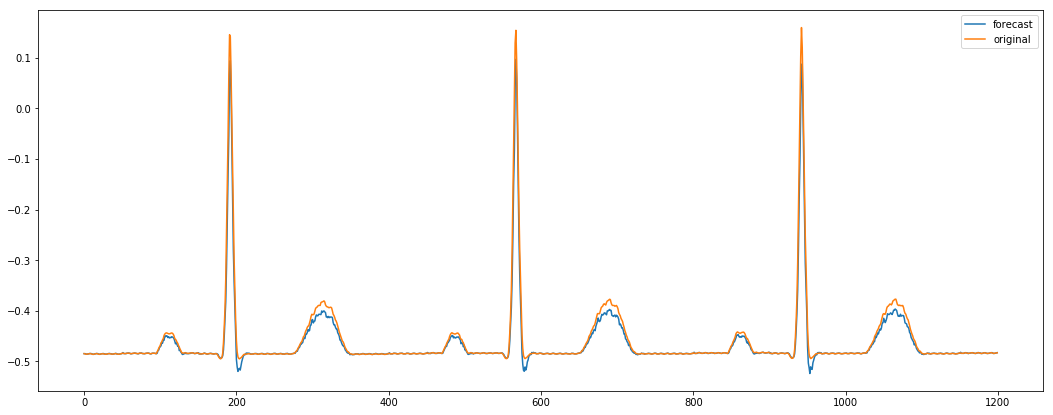

In [48]:
##############################
# Forecast with Deseasonized Model
##############################

fig = plt.figure(figsize=(18, 7))
predicted_ARIMA_actual.plot(label='forecast')
df_boxcox.plot(label='original')
plt.legend()
plt.show()

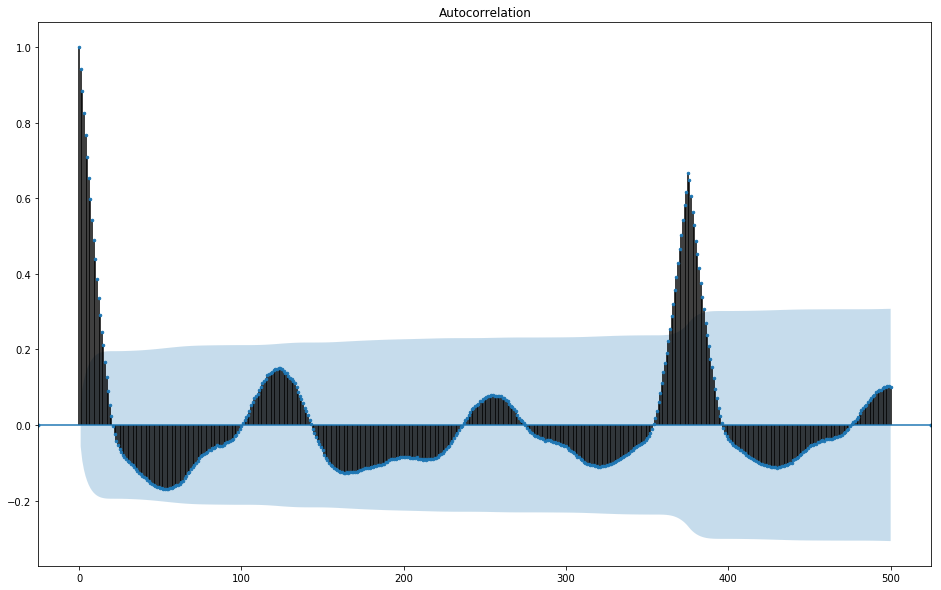

In [49]:
##############################
# Plot Residuals
##############################
df_residuals = df_boxcox - predicted_ARIMA_actual

fig = sm.graphics.tsaplots.plot_acf(df_residuals, lags=500, **{'marker': '.'})
fig.set_size_inches(16, 10)
plt.show()

# Diagnostic Checking

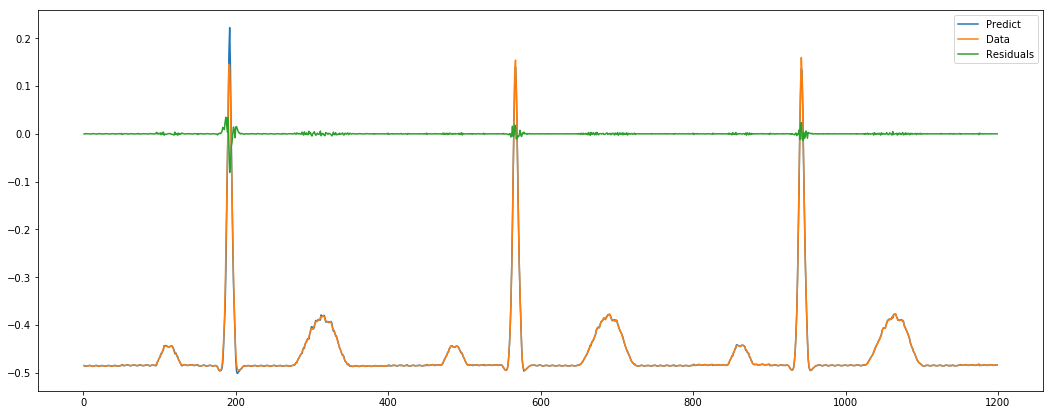

In [64]:
##############################
# Plot Residual
##############################
ts_length = df_boxcox.shape[0]
df_predict = model_4.fittedvalues
df_residuals = df_boxcox[1:] - df_predict[1:]

fig = plt.figure(figsize=(18, 7))
df_predict[1:].plot(label='Predict')
df_boxcox[1:].plot(label='Data')
df_residuals.plot(label='Residuals')
plt.legend()
plt.show()

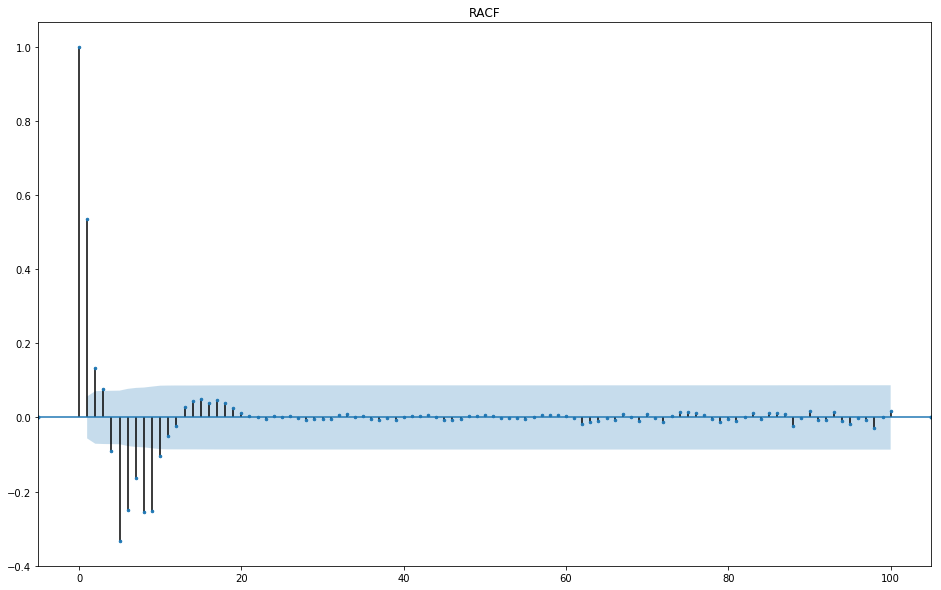

In [65]:
##############################
# Plot RACF
##############################

fig = sm.graphics.tsaplots.plot_acf(df_residuals, lags=100, **{'marker': '.'})
fig.set_size_inches(16, 10)
plt.title('RACF')
plt.show()

## Diagnostic Checks

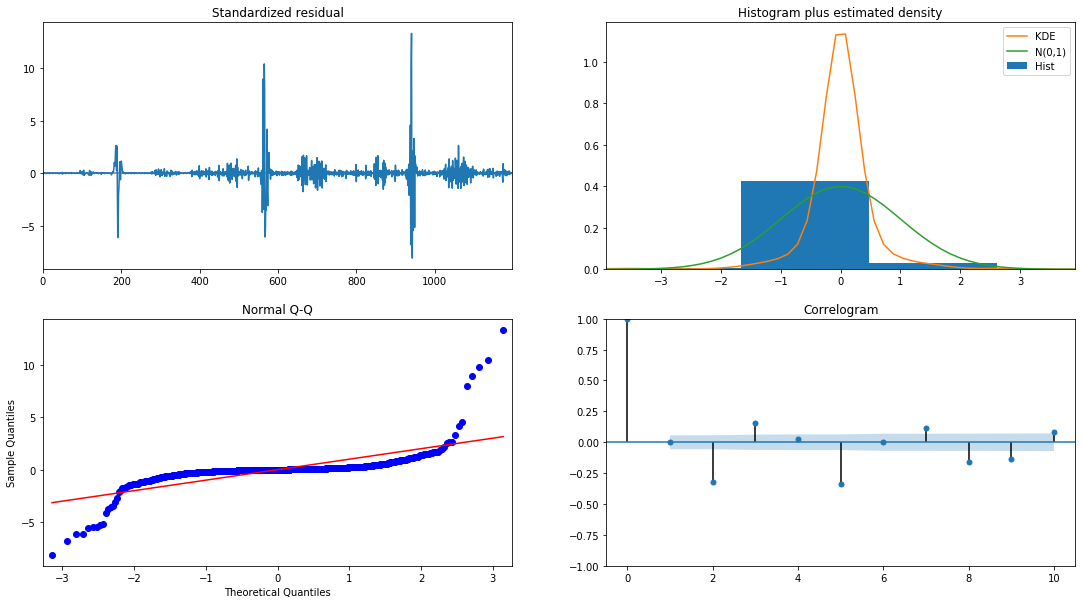

In [53]:
##############################
# Diagnositc Checks
##############################
fig = model_4.plot_diagnostics()
fig.set_size_inches(18.5, 10)
plt.show()

## Heteroskedasticity

In [45]:
##############################
# Heteroskedasticity Tests
##############################
model_1.test_heteroskedasticity(None)

array([[8.29412424e+00, 3.87185414e-85]])

## Normality

In [47]:
##############################
# Normality Tests
##############################
model_1.test_normality(None)

array([[8.52148815e+05, 0.00000000e+00, 8.07221357e+00, 1.32546647e+02]])

# Model Testing

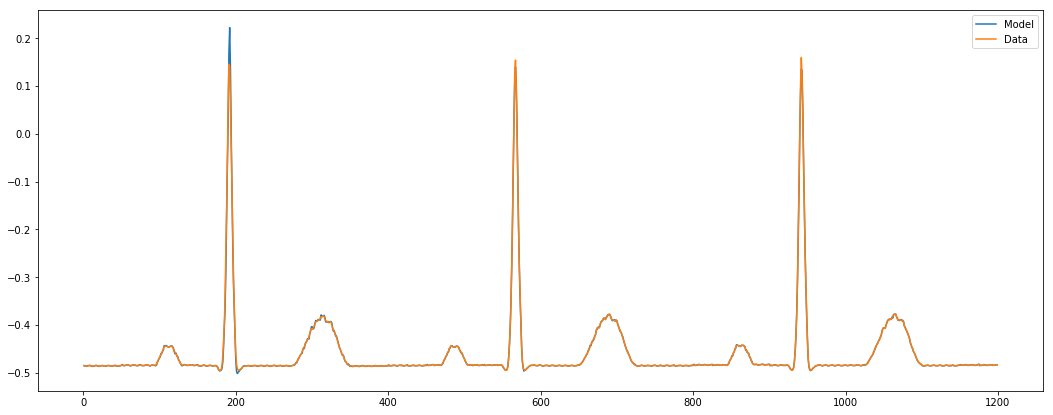

RMSE: 0.2566965795380809


In [75]:
##############################
# Model Forecasting
##############################
ts_length = df_boxcox.shape[0]
df_predict = model_4.fittedvalues
df_residuals = df_boxcox[1:] - df_predict[1:]

fig = plt.figure(figsize=(18, 7))
df_predict[1:].plot(label='Model')
df_boxcox[1:].plot(label='Data')
# use_dataframe[1:].plot(label='Original')
# df_residuals.plot(label='Residuals')
plt.legend()
plt.show()

RMSE = sum((model_4.fittedvalues - df_boxcox)**2)
print('RMSE: {}'.format(RMSE))